# A Second Empirical Exploration of Machine Learning Concepts

## Linear regression predictors
Let define the class of affine function $$L_d = \{h_{w,b}: w\in\mathbb{R}^d, b\in\mathbb{R}\},$$
where $$h_{w,b}(x)=w\cdot x+b = \sum_{j=1}^d w_jx_j + b.$$
> ### Note that
> It may be more convenient to incorporate $b$, called the bias, into $w$ as an extra coordinate and add an extra   coordinate with a value of 1 to all $x \in {\cal X}$. Let $w'=(b,w_1,\ldots,w_d)\in \mathbb{R}^{d+1}$ and $x'=(1,x_1,\dots,x_d)\in\mathbb{R}^{d+1}$. We can write, $$h_{w,b}(x)=w\cdot x+b=w'\cdot x' .$$

The hypothesis class of *linear regression predictors* is the set of linear functions ${\cal H}_{lin}=L_d$. *Least squares* is the algorithm that solves the ERM problem for the hypothesis class of linear regression predictors with respect to the squared loss. The ERM problem with respect to this class, given a training set S is to find:
$$\textrm{argmin}_w L_S(h_w)=\textrm{argmin}_w \frac{1}{m}\sum_{i=1}^m(w'\cdot x_i' - y_i)^2$$

Some learning tasks call for nonlinear predictors, such as polynomial predictors. Take, for instance, a one dimensional polynomial function of degree $n$, that is, $$p(x)=a_0+a_1 x+a_2 x^2+\ldots +a_n x^n.$$ One way to learn this class is by reduction to the problem of linear regression. To translate a polynomial regression
problem to a linear regression problem, we define the mapping $\psi:\mathbb{R} \rightarrow \mathbb{R}^{n+1}$
such that $\psi(x) = (1, x, x^2, \ldots, x^n)$. Then we have that $$p(\psi(x)) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n = a\cdot\psi(x)$$ and we can find the optimal vector of coefficients $a$ by using the Least Squares algorithm. 

> ### Questions:
> 1. Use the [LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) module from sklearn to learn a linear regression predictor for the `dataA` set.
> 1. Use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) modules in sklearn to learn a polynomial predictor for the `dataA`. 
> 1. Compute and display the errors obtained for different values of $d$ for `dataA` sets and then for `dataB` sets. Try to understand how the datasets were generated (`unknown_ditrib.py`) to explain the results.
> 1. Find the best regressor to solve the task in (https://archive.ics.uci.edu/ml/datasets/Abalone)




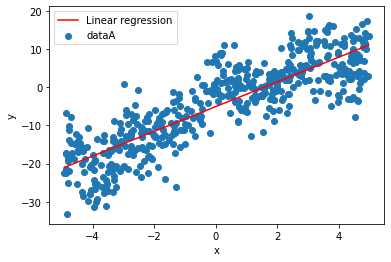

In [1]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

testA = pd.read_csv("./dataA_test.csv")
X = testA["x"].values[:,np.newaxis] # column matrix instead of line vector
y = testA["y"]
reg = linear_model.LinearRegression()
reg.fit(X,y)

xsupport = pd.DataFrame(np.linspace(min(testA.x),max(testA.x),500))
y_ = reg.predict(xsupport)

plt.scatter(testA["x"], testA["y"], label='dataA')
plt.plot(xsupport, y_, c='r',label='Linear regression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

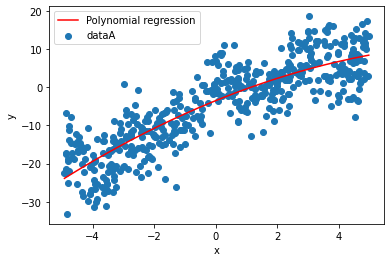

In [2]:
#Q2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)
y_plot = model.predict(xsupport)

plt.scatter(testA["x"], testA["y"], label='dataA')
plt.plot(xsupport, y_plot, c='r',label='Polynomial regression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [15]:
test = pd.read_csv('abalone.data')
print(test)
entries = test.iloc[:, 0:-1].values[:,np.newaxis] # column matrix instead of line vector
y = test.iloc[:, -1]
print(entries)
#print(y)

      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]
[[['M' 0.35 0.265 ... 0.0995 0.0485 0.07]]

 [['F' 0.53 0.42 ... 0.2565 0.1415 0.21]]

 [['M' 0.44 0.365 ... 0.2155 0.114 0.155]]

 ...

 [['M' 0.6 0.475 ... 0.5255 0.2875 0.308]]

 [['F' 0.625 0

<AxesSubplot:xlabel='d'>

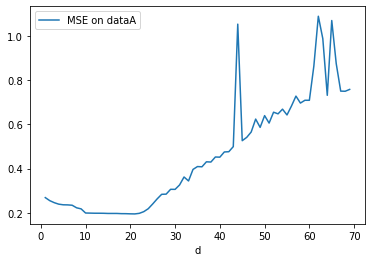

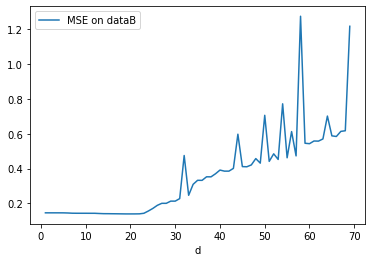

In [5]:
#Q3
from sklearn.metrics import explained_variance_score
def error_depending_on_d(dataset): 
    errors = []
    for d in range(1, 70):
        # Preprocess data
        test = pd.read_csv(dataset)
        X = test["x"].values[:,np.newaxis] # column matrix instead of line vector
        y = test["y"]
        #Train
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X,y)
        #Make a prediction of the target using the model trained on the train set
        y_ = model.predict(X)
        #Error calculation
        errors.append([d, 1-explained_variance_score(y, y_)])#mean_squared_error(y, y_))
    return errors
#Error display
errors_A = error_depending_on_d("./dataA_test.csv")
errors_B = error_depending_on_d("./dataB_test.csv")
df_A = pd.DataFrame(errors_A,columns=['d','MSE on dataA'])
df_B = pd.DataFrame(errors_B,columns=['d','MSE on dataB'])
df_A.plot(x='d',y='MSE on dataA')
df_B.plot(x='d',y='MSE on dataB')